## Haberman Survial Data Analysis

Total 36 values and 4 feature in the haberman breast cancer survival dataset.
- first feature is age(age at the time of operation).
- second feature is year of operation(1958 to 1990).
- third one is no of axuilary nodes detected
- last one is output feature survival of the patient.
-      1 = the patient survived 5 years or longer
-      2 = the patient died within 5 year

### Import the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("haberman.csv")

In [5]:
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
data.shape

(305, 4)

Create the columns(features name) to the dataset

In [7]:
data.columns=['age','year of operation','Axuilary node','Survival Status']

In [8]:
data.head()

,age,year of operation,Axuilary node,Survival Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [9]:
data.shape

(305, 4)

In [10]:
data.isnull().sum()

age                  0
year of operation    0
Axuilary node        0
Survival Status      0
dtype: int64

- No null values present in the dataset

In [11]:
data.duplicated().sum()

17

In [12]:
data=data.drop_duplicates()

In [13]:
data.duplicated().sum()

0

- duplicates are there in the dataframe so remove the duplicates after that total 228 values are there

In [14]:
data.shape

(288, 4)

In [19]:
print("No of Unique Values in the feature Age:",len(data.age.unique()))
data.age.unique()

No of Unique Values in the feature Age: 49


array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83])

In [20]:
print("No of Unique Values in the feature  Year of Operations : ",len(data['year of operation'].unique()))
data['year of operation'].unique()

No of Unique Values in the feature  Year of Operations :  12


array([62, 65, 59, 58, 60, 66, 61, 67, 64, 63, 69, 68])

In [23]:
print('No of Unique Values in the feature Axuilary : ',len(data['Axuilary node'].unique()))
data['Axuilary node'].unique()

No of Unique Values in the feature Axuilary :  31


array([ 3,  0,  2,  4, 10,  9, 30,  1,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28])

In [58]:
data["Survival Status"].unique()

array([1, 2])

In [24]:
data["Survival Status"].value_counts()

Survival Status
1    209
2     79
Name: count, dtype: int64

# Obersvations
- Age attribute have 49 values from range 30 to 83
- Year of operation have 12 values from 1958 to 1969
- Axuilary node have 31 values from 0 to 52
- Finally the survival status have 2 values 1 is 209 values and 2 is 79 values

### Dataset is Imbalanced 

In [60]:
data.describe()

,age,year of operation,Axuilary node,Survival Status
count,288.000000,288.000000,288.000000,288.000000
mean,52.500000,62.902778,4.232639,1.274306
std,10.814882,3.280859,7.335516,0.446940
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,5.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Statistical Analysis

52.5


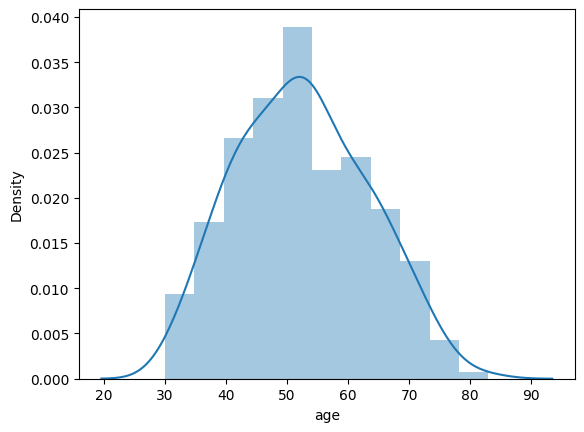

In [25]:
sns.distplot(data.age)
print(np.mean(data.age))

- In the age feature 48 to 51 are more values.
- Mean of the age is 52.5

62.90277777777778


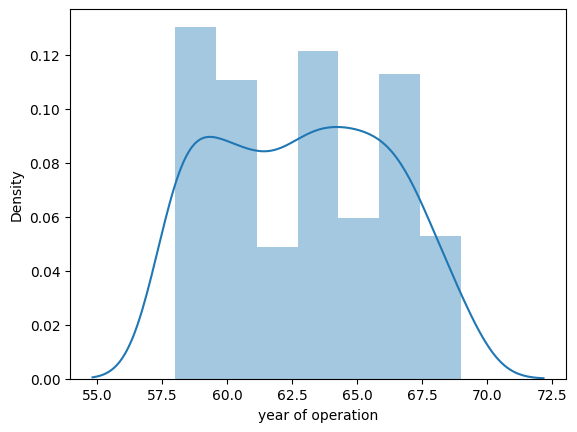

In [27]:
sns.distplot(data["year of operation"])
print(np.mean(data['year of operation']))

- The years 1958, 1963, and 1966 had the highest number of operations performed.

4.232638888888889


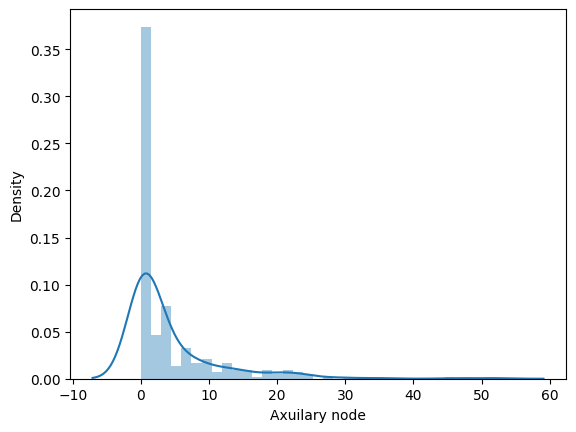

In [26]:
sns.distplot(data["Axuilary node"])
print(np.mean(data['Axuilary node']))

- 0 axuilary nodes are more in the dataset

### Univariant Analysis

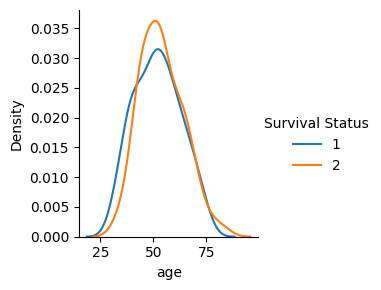

In [67]:
sns.FacetGrid(data,hue='Survival Status').map(sns.kdeplot,'age').add_legend()
plt.show()

- age at 30-40 have more chance to survival than not survive.

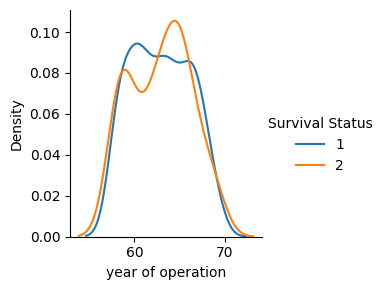

In [68]:
sns.FacetGrid(data,hue='Survival Status').map(sns.kdeplot,'year of operation').add_legend()
plt.show()

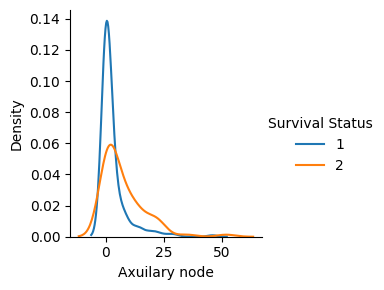

In [69]:
sns.FacetGrid(data,hue='Survival Status').map(sns.kdeplot,'Axuilary node').add_legend()
plt.show()

- Node value with 0 have higher chance of survival.
- More than 50 node their is no chance to survive.

### Observation
- By the univariant analysis we can't classify the classes because all the attribute output classes are overlapped

### Bivariant Analysis

<Axes: xlabel='age', ylabel='year of operation'>

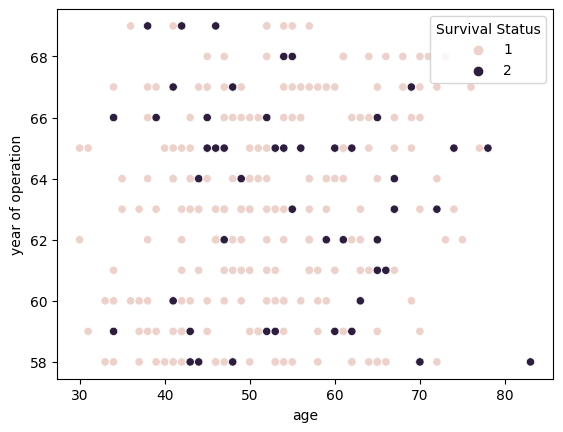

In [71]:
sns.scatterplot(x='age',y='year of operation',data=data,hue="Survival Status")

<Axes: xlabel='age', ylabel='Axuilary node'>

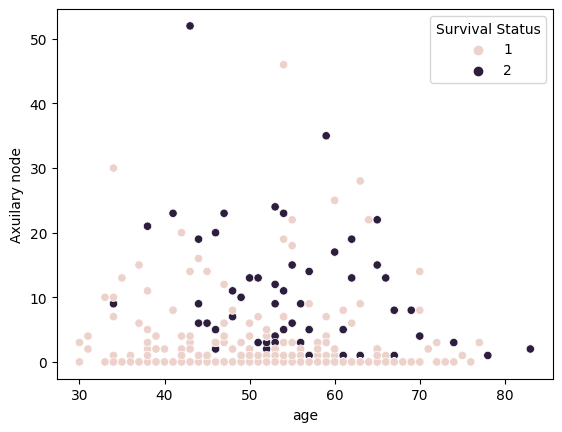

In [72]:
sns.scatterplot(x='age',y='Axuilary node',data=data,hue="Survival Status")

- Age between 30-40 and axuilary node between 0-10 have higher chance to survive.

<Axes: xlabel='year of operation', ylabel='Axuilary node'>

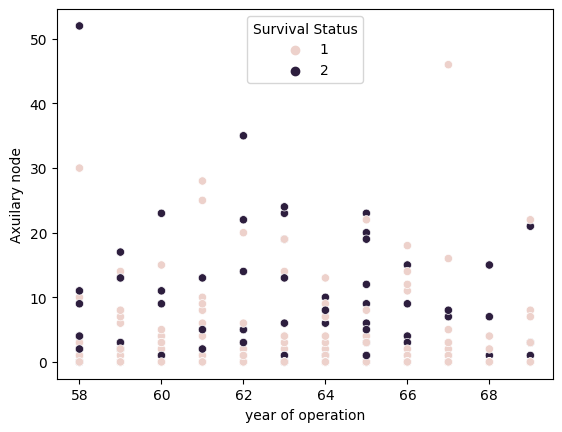

In [73]:
sns.scatterplot(x='year of operation',y='Axuilary node',data=data,hue="Survival Status")

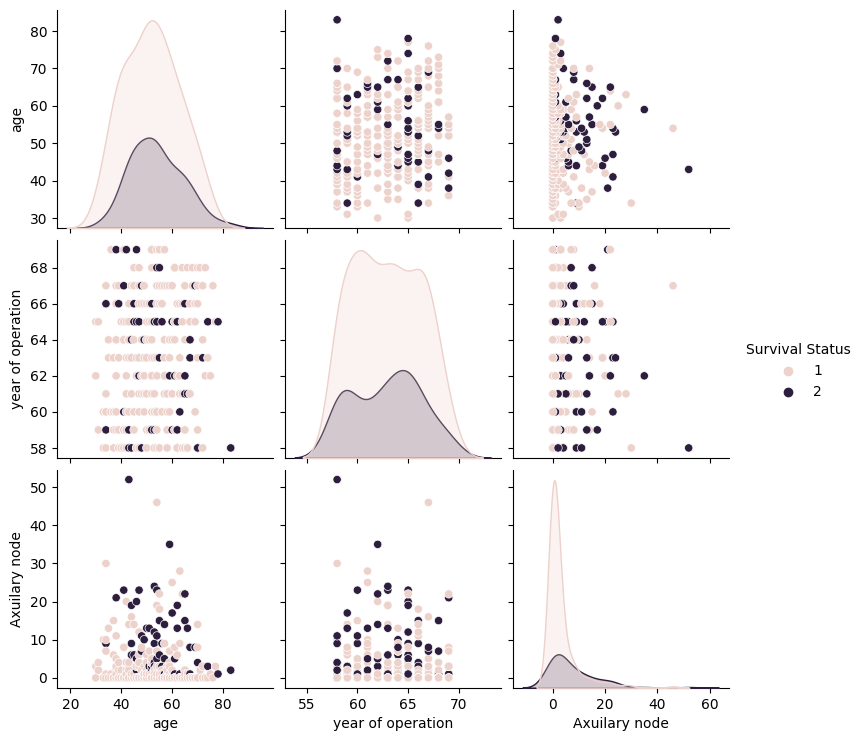

In [75]:
sns.pairplot(data,hue="Survival Status")

<Axes: xlabel='year of operation', ylabel='age'>

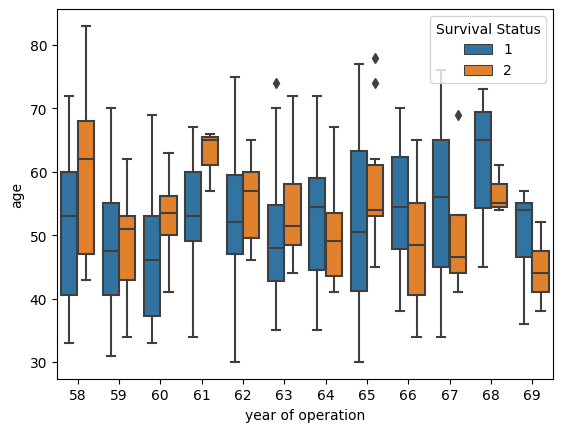

In [78]:
sns.boxplot(x='year of operation',y='age',data=data,hue="Survival Status")

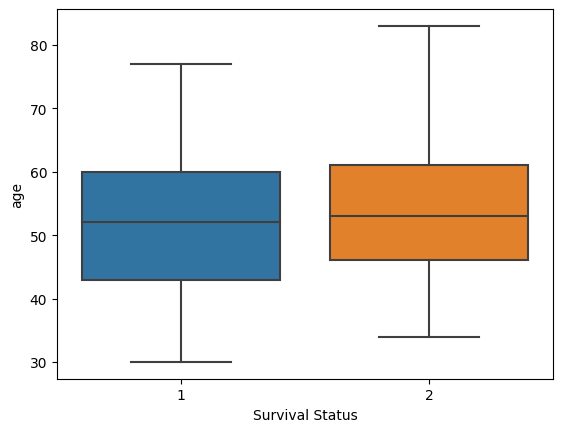

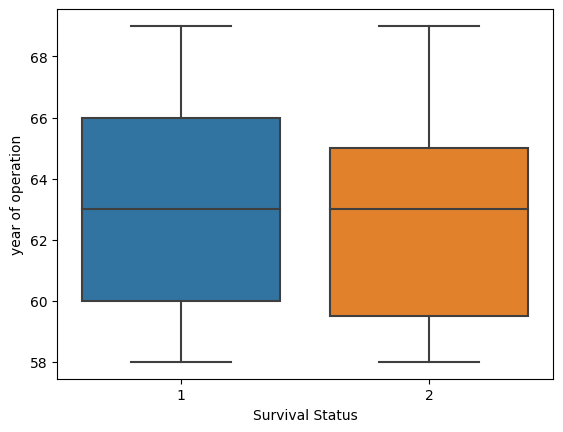

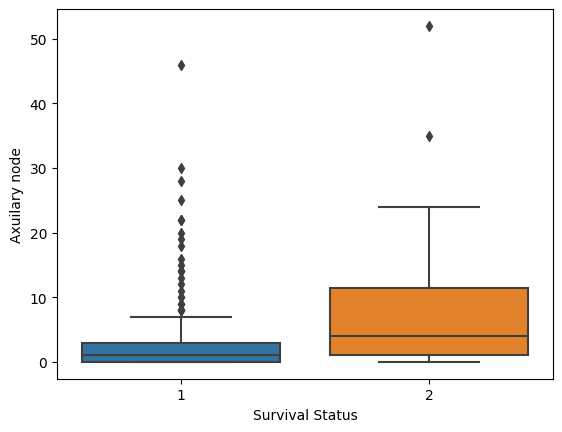

In [36]:
sns.boxplot(x='Survival Status',y='age',data=data);plt.show();
sns.boxplot(x='Survival Status',y='year of operation',data=data);plt.show();
sns.boxplot(x='Survival Status',y='Axuilary node',data=data);plt.show();
plt.show()

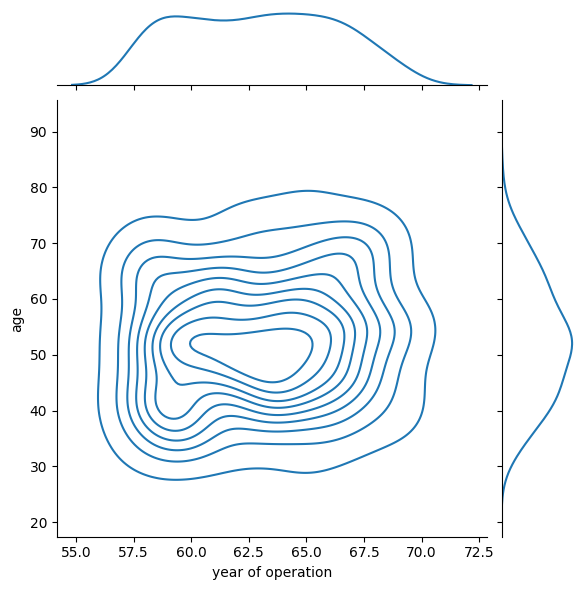

In [37]:
sns.jointplot(x ='year of operation', y = 'age', data = data, kind ='kde')
plt.show()

- Year of operation from 1960-1965 and age from 45-55 have more operations performed.

## Conclusion
- In the scatter plot between age and axuilary node , age less than 40 is survival more then age 40
- Due to imbalance target variable, we can't classify the target variable easily with univariant and bivariant analysis
- Survival chances are more if less axillary nodes are present. Zero axillary nodes, however, do not guarantee survival.
- Class imbalance leads to such conclusions. If the data remains balanced, better conclusions can be reached at.